# 지도학습 분류 미리보기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:/Windows/Fonts/batang.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

## 셍선 이진분류: 도미(bream) or 빙어(smelt)
- 이진분류: 0, 1로 구분 
- 도미야? (1) 도미가 아니야? (0)

In [6]:
# 도미
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
len(bream_length), len(bream_weight)

(35, 35)

In [5]:
# 빙어
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
len(smelt_length), len(smelt_weight)

(14, 14)

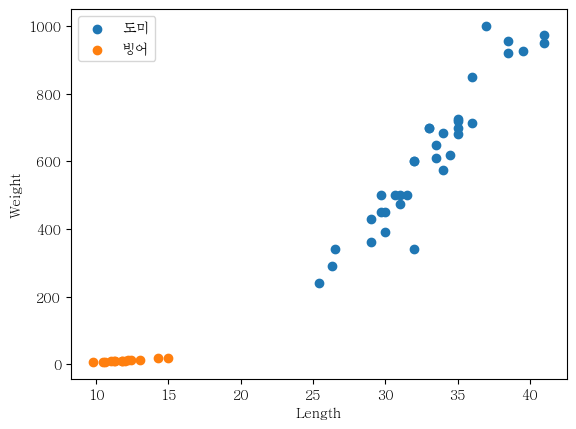

In [8]:
# 데이터 분포 확인 (Scatter plot)
plt.scatter(bream_length, bream_weight, label='도미')
plt.scatter(smelt_length, smelt_weight, label='빙어')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.show()

### 데이터 전처리
- 모델이 원하는 형태로 데이터 가공
    - 입력(특성): [길이, 무게] ➡️ 2차원 배열
    - 결과(정답): 도미 or 빙어 ➡️ 1, 0으로 구성된 1차원 배열

In [16]:
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight
#len(fish_length), len(fish_weight)

# 훈련 입력 데이터
train_input = []
for l,w in zip(fish_length, fish_weight):
    train_input.append([l,w])
#train_input

# 훈련 정답 데이터
train_label = [1]*len(bream_length) + [0]*len(smelt_length) # [1,1,1,1,1,..,0,0,0,...]
#train_label

## K-Nearest Neighbors (KNN) K-최근접 이웃 분류 모델

In [17]:
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
kn = KNeighborsClassifier() # Model 객체 생성

# fit(훈련/학습) - score(평가) - predict(예측)
kn.fit(train_input, train_label) # 입력 데이터, 정답 데이터
kn.score(train_input, train_label) # 1.0 == 100%

name_label = ['Smelt', 'Bream']

print(kn.predict([[30,500], [10,5]]))

for predict in kn.predict([[30,500], [10,5]]):
    print(name_label[predict], end=' ')


[1 0]
Bream Smelt 

In [ ]:
# 최근접 이웃 모델의 작동 원리
# - 주어진 데이터와 가장 가까운 K개의 이웃을 찾고, 이웃 데이터를 이용해 예측
# - 따라서 최근접 이웃 모델의 훈련은 별도의 연산 없이 모델이 데이터를 로드하면 끝남

# kn.kneighbors()
# - distances: 모델 데이터 포인트와의 거리
# - index: 모델 데이터 포인트의 인덱

distances, index = kn.kneighbors([[30,500]]) # 5개 이웃 출력 (기본값):
print(distances) # 입력 데이터로부터 이웃까지의 거리
print(index) # 이웃들의 index

# Fancy indexing으로 찍어봄
print(np.array(train_input)[index])
print(np.array(train_label)[index])

[[ 0.3         0.7         1.          1.5        25.01999201]]
[[ 6  9 11 12 10]]
[[[ 29.7 500. ]
  [ 30.7 500. ]
  [ 31.  500. ]
  [ 31.5 500. ]
  [ 31.  475. ]]]
[[1 1 1 1 1]]


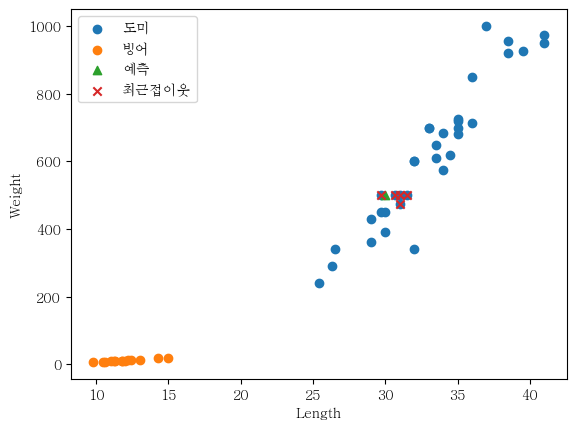

In [35]:
train_input = np.array(train_input)

plt.scatter(bream_length, bream_weight, label='도미')
plt.scatter(smelt_length, smelt_weight, label='빙어')
plt.scatter(30,500, label='예측', marker='^')
plt.scatter(train_input[index,0], train_input[index,1], label='최근접이웃', marker='x')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [ ]:
kn49 =  KNeighborsClassifier(n_neighbors = 49) # k-이웃 개수 변경

kn49.fit(train_input, train_label)
kn49.score(train_input, train_label) # 평가 점수가 71점 나옴

0.7142857142857143

### 훈련 데이터-테스트(평가) 데이터 분리

In [38]:
fish_input = []

for l,w in zip(fish_length, fish_weight):
    fish_input.append([l,w])

fish_label = [1]*len(bream_length) + [0]*len(smelt_length)

In [ ]:
# sampling 편향: 데이터가 한쪽으로 치우친 현상
# train 데이터는 전부 다 도미, test 데이터는 전부 다 빙
train_input = fish_input[:35]
train_label = fish_label[:35]   # 1

test_input = fish_input[35:]
test_label = fish_label[35:]    # 0

kn = KNeighborsClassifier()
kn.fit(train_input, train_label)
kn.score(test_input, test_label)

0.0

In [45]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_label, test_label = \
train_test_split(fish_input, fish_label, test_size=0.3, stratify=fish_label, random_state=42) 
# - stratify:  feature 값을 지정해 주면 피처값의 비율대로 데이터셋을 나누도록 하는 설정
# - random_state: 테스트 시 고정된 값을 사용해야 모델을 바꿨을 때도 동일한 조건에서 성능을 확인할 수 있으므로 고정값을 지정하는 설정

print(len(train_label), len(test_label))
print(sum(train_label), sum(test_label))

34 15
24 11


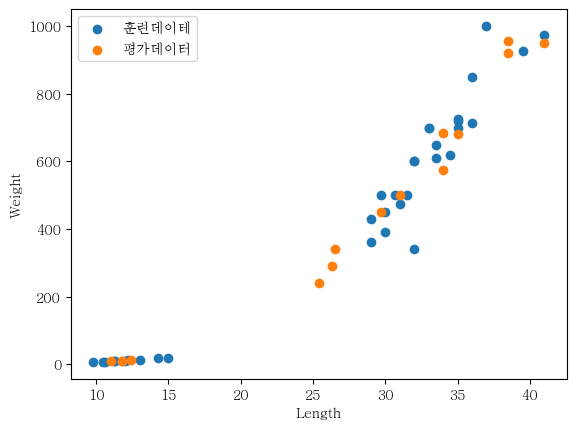

In [49]:
train_input = np.array(train_input)
test_input = np.array(test_input)

plt.scatter(train_input[:,0], train_input[:,1], label='훈련데이테')
plt.scatter(test_input[:,0], test_input[:,1], label='평가데이터')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [50]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_label)
kn.score(test_input, test_label)

1.0

#### 정규화
- 데이터포인트의 값의 범위를 재정의하는 것
    - StandardScaler
    - MinMaxScaler

In [51]:
predict_input = [25, 150]
kn.predict([predict_input])

array([0])

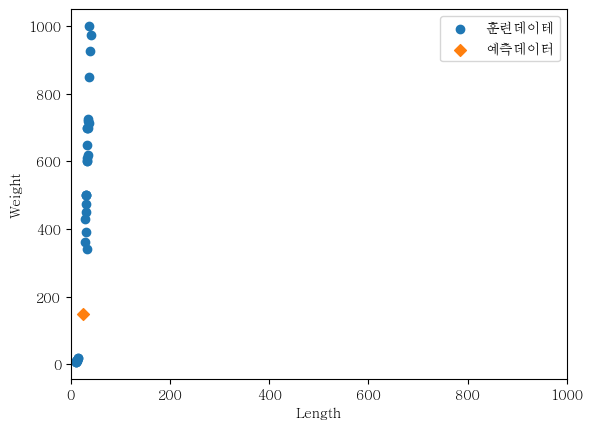

In [53]:
plt.scatter(train_input[:,0], train_input[:,1], label='훈련데이테')
plt.scatter(predict_input[0], predict_input[1], label='예측데이터', marker='D')
#plt.scatter(test_input[:,0], test_input[:,1], label='평가데이터')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.xlim((0,1000))
plt.legend()
plt.show()

In [ ]:
distances, index = kn.kneighbors([predict_input])
np.array(train_label)[index] # fancy indexing

array([[0, 0, 0, 0, 0]])

##### 표준 점수 (Z-score)
- 평균에서 얼마나 떨어져 있는지를 표준편차 단위로 계산한 값
$$
    표준점수 (Z) = \frac{x - \bar{x}}{\sigma}
$$

In [ ]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
mean, std # for both length and weight

(array([ 27.02352941, 445.60294118]), array([ 10.0816099 , 319.21122132]))

In [58]:
# Z score transformation
train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

In [59]:
train_scaled, test_scaled

(array([[-1.4703534 , -1.35773091],
        [ 0.49361864,  0.48368306],
        [ 0.74159491,  0.54633749],
        [ 0.36467098,  0.17041086],
        [ 0.49361864,  0.48368306],
        [ 0.79119016,  0.85960969],
        [-1.55962486, -1.36869543],
        [ 0.89038067,  0.84081336],
        [ 0.19604712, -0.04887968],
        [-1.56954391, -1.36524944],
        [ 0.26548048,  0.17041086],
        [-1.4901915 , -1.36524944],
        [ 0.39442813,  0.09209281],
        [ 0.98957118,  1.73677184],
        [ 0.19604712, -0.25877205],
        [ 0.59280915,  0.79695525],
        [-1.26205334, -1.33423549],
        [ 0.44402339,  0.17041086],
        [ 1.23754745,  1.50181769],
        [-1.70841062, -1.37496088],
        [ 0.89038067,  1.26686354],
        [-1.63897726, -1.3724547 ],
        [ 0.6424044 ,  0.51501027],
        [-1.62905821, -1.37402106],
        [ 0.79119016,  0.79695525],
        [ 0.79119016,  0.8752733 ],
        [-1.391001  , -1.35773091],
        [ 0.29523763,  0.013

In [60]:
# standarized 된 데이터로 학습
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_label)
kn.score(test_scaled, test_label)

1.0

In [ ]:
# predict_input = [25, 150]
# Input data encoding
predict_scaled = (predict_input - mean) / std

kn.predict([predict_scaled]) # standarized 안하면 0 이라고 예측하는데, 하니까 1

array([1])

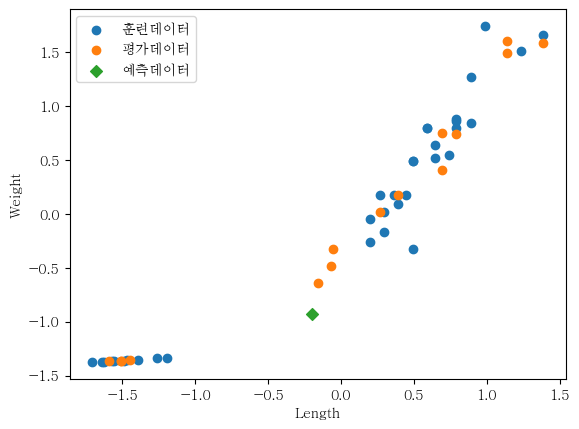

In [65]:
# 데이터 분포 확인
plt.scatter(train_scaled[:,0], train_scaled[:,1], label='훈련데이터')
plt.scatter(test_scaled[:,0], test_scaled[:,1], label='평가데이터')
plt.scatter(predict_scaled[0], predict_scaled[1], label='예측데이터', marker='D')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [68]:
# StandardScaler: 위에서 직접 한 짓 해주는 매직, 개꿀이죠?
# fit(계산) - transformation
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
train_scaled_by_scaler = std_scaler.fit_transform(train_input)

# 위에서 한 거랑 똑같은 지 확인
for i in range(len(train_input)):
    print(train_scaled[i] == train_scaled_by_scaler[i])

[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]
[ True  True]


### 이진분류 정리

하나의 코드셀로 정리

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier # KNN model
from sklearn.model_selection import train_test_split # train-test split
from sklearn.preprocessing import StandardScaler # standarization (Z-score transforamtion)

## Data
# 도미
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# 빙어
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
len(smelt_length), len(smelt_weight)
#--------------------------------------------------------------------------

## Preprocessing
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

fish_input = []
for l,w in zip(fish_length, fish_weight):
    fish_input.append([l,w])

fish_label = [1]*len(bream_length) + [0]*len(smelt_length)

# train-test split
train_input, test_input, train_label, test_label = \
train_test_split(fish_input, fish_label, test_size=0.3, stratify=fish_label, random_state=42) 

# Standarization
std_scaler = StandardScaler()
train_scaled_by_scaler = std_scaler.fit_transform(train_input)
test_scaled_by_scaler = std_scaler.fit_transform(test_input)
#---------------------------------------------------------------------------

## Model Train
kn = KNeighborsClassifier()
kn.fit(train_scaled_by_scaler, train_label)
#---------------------------------------------------------------------------

## Model Score Check (Evaluation)
kn.score(test_scaled_by_scaler, test_label)
##----------------------------------------------------------------------------

## Prediction
predict_input = [25, 150]
# Standarization
predict_scaled_by_scaler = std_scaler.fit_transform([predict_input])
kn.predict(predict_scaled_by_scaler)

array([1])

---

# 생선 '다중 분류'

In [75]:
df = pd.read_csv('./data/fish.csv')
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [76]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [78]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [80]:
df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [84]:
df[df['Weight']==0]
zero_weight_idx = df[df['Weight']==0].index[0] # 배열이니까 0번째 꺼내는 것

df = df.drop(zero_weight_idx).reset_index(drop=True)
df.describe()

,Weight,Length,Diagonal,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.731707,11.627605,4.295191,1.689010
min,5.900000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,63.400000,68.000000,18.957000,8.142000


#### 데이터 Preprocessing
(scatter plot 같은 걸로 봤다고 가정하고)
  
- 훈련 데이터의 규격: input + label ➡️ X, y 데이터를 분리 ➡️ ndarray
- Train-test set split
- Train set standarization (컬럼값 사이의 차이를 완화)

In [87]:
# 입력-정답 데이터 분리
fish_input = df[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_label = df['Species'].to_numpy()

fish_input.shape, fish_label.shape

((158, 5), (158,))

In [ ]:
# 훈련-평가 데이터 분리 (import 위에서 함)
train_input, test_input, train_label, test_label = \
train_test_split(fish_input, fish_label, test_size=.10, random_state=0)

train_input.shape, test_input.shape, train_label.shape, test_label.shape

((142, 5), (16, 5), (142,), (16,))

In [89]:
# 정규화 (import 위에서 함)
standard_scaler = StandardScaler()
standard_scaler.fit(train_input) # 훈련 데이터 기준 평균/표준편차 작업
train_scaled_input = standard_scaler.transform(train_input) # 훈련 데이터 정규화 반영
test_scaled_input = standard_scaler.transform(test_input) # 테스트 데이터 정규화 반영 (기준은 훈련데이터)

In [90]:
kn = KNeighborsClassifier(n_neighbors=7)
kn.fit(train_scaled_input, train_label)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
# 모델 내부에 저장된 훈령 데이터를 나타내는 속성 
kn._fit_X

array([[-2.36306956e-01,  6.76343006e-01,  7.08519057e-01,
        -6.71430898e-01,  2.30468738e-02],
       [-5.88599673e-01, -2.83008776e-01, -3.74726203e-01,
        -5.56040991e-01, -3.95072820e-01],
       [ 3.43340885e+00,  3.07472246e+00,  2.92785081e+00,
         1.68844327e-01,  1.07273073e+00],
       [-2.18692320e-01,  4.79675891e-03,  3.96929443e-03,
        -1.96877826e-02,  2.00340601e-01],
       [-7.06030578e-01, -5.22846721e-01, -5.06829283e-01,
        -5.30696954e-01, -6.08934870e-01],
       [ 1.74533958e+00,  1.25195407e+00,  1.33380697e+00,
         2.24118377e+00,  1.43262745e+00],
       [ 1.81873389e+00,  1.15601890e+00,  1.12244204e+00,
         8.00495699e-01,  1.30001508e+00],
       [ 2.04058940e-01,  1.96667115e-01,  3.82664792e-01,
         1.17914249e+00,  2.97100501e-01],
       [-7.94103758e-01, -6.85936524e-01, -6.74159852e-01,
        -6.18380440e-01, -5.66759007e-01],
       [-8.88048482e-01, -8.77806880e-01, -8.41490420e-01,
        -7.54183192e-01

In [ ]:
# 모델이 학습한 클래스(label)의 목록을 나타내는 속
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

- 다중분류 작동 방식: 다중분류 클래스 값의 크기와 같은 형태로 결과를 도출

In [97]:
# 예측
print("예측 결과: ", kn.predict(test_scaled_input[5:10]))

# 정답
print("정답 결과:", test_label[5:10])

예측 결과:  ['Perch' 'Perch' 'Perch' 'Perch' 'Perch']
정답 결과: ['Perch' 'Perch' 'Pike' 'Perch' 'Perch']


In [100]:
print(kn.classes_)
kn.predict_proba(test_scaled_input[5:10]) # 각각에 대한 예측 확률

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


array([[0.        , 0.        , 0.85714286, 0.        , 0.        ,
        0.        , 0.14285714],
       [0.        , 0.        , 0.71428571, 0.        , 0.        ,
        0.        , 0.28571429],
       [0.        , 0.        , 0.42857143, 0.42857143, 0.        ,
        0.        , 0.14285714],
       [0.        , 0.        , 0.71428571, 0.        , 0.14285714,
        0.        , 0.14285714],
       [0.        , 0.        , 0.71428571, 0.        , 0.28571429,
        0.        , 0.        ]])

In [ ]:
# 예측 값 주변 이웃 봐보기
distance, index = kn.kneighbors(test_scaled_input[7:8])
print(distance, index)
print(train_label[index])

[[0.91101148 1.22823945 1.54569749 1.58666383 1.59724465 1.68338757
  1.72850434]] [[115 131  73  50  77  84   6]]
[['Pike' 'Pike' 'Perch' 'Perch' 'Pike' 'Perch' 'Whitefish']]


#### 평가

In [102]:
kn.score(test_scaled_input, test_label)

0.875